# Análisis Exploratorio - EMSE

Análisis exploratorio de los datos de la tercera encuesta mundial de salud escolar en Argentina realizada en 2018.
El objetivo de tal encuesta es proporcionar datos precisos sobre comportamientos relativos a la salud y los factores de riesgo y de protección  entre estudiantes de Argentina.

La EMSE utiliza una metodología estandarizada a nivel mundial para relevar datos sobre aspectos sociodemográficos e indaga sobre conductas relacionadas con el comportamiento alimentario, el consumo de alchol y otras drogas, la violencia y daños no intencionados, la seguridad vial, la salud mental, el consumo de tabaco, la actividad física, los comportamientos sexuales y los factores de protección.

La encuesta fue realizada entre los meses de mayo y diciembre de 2018.

In [18]:
# importar paquetes y crear df
# explorar la forma de la tabla, 56 mil filas y 306 columnas

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("EMSE_DatosAbiertos.csv")
df.shape

(56981, 309)

In [19]:
# Observar columnas
# Con tolist() podemos ver el total de columnas en forma de lista

df.columns.tolist()

['sitio',
 'record',
 'q1',
 'texto_q1',
 'q2',
 'texto_q2',
 'q3',
 'texto_q3',
 'q4',
 'q5',
 'q6',
 'texto_q6',
 'q10',
 'texto_q10',
 'q15',
 'texto_q15',
 'q16',
 'texto_q16',
 'q17',
 'texto_q17',
 'q18',
 'texto_q18',
 'q19',
 'texto_q19',
 'q22',
 'texto_q22',
 'q23',
 'texto_q23',
 'q24',
 'texto_q24',
 'q25',
 'texto_q25',
 'q26',
 'texto_q26',
 'q27',
 'texto_q27',
 'q28',
 'texto_q28',
 'q29',
 'texto_q29',
 'q30',
 'texto_q30',
 'q31',
 'texto_q31',
 'q32',
 'texto_q32',
 'q33',
 'texto_q33',
 'q34',
 'texto_q34',
 'q35',
 'texto_q35',
 'q36',
 'texto_q36',
 'q37',
 'texto_q37',
 'q38',
 'texto_q38',
 'q39',
 'texto_q39',
 'q40',
 'texto_q40',
 'q41',
 'texto_q41',
 'q42',
 'texto_q42',
 'q43',
 'texto_q43',
 'q44',
 'texto_q44',
 'q45',
 'texto_q45',
 'q46',
 'texto_q46',
 'q47',
 'texto_q47',
 'q48',
 'texto_q48',
 'q49',
 'texto_q49',
 'q50',
 'texto_q50',
 'q51',
 'texto_q51',
 'q52',
 'texto_q52',
 'q53',
 'texto_q53',
 'q54',
 'texto_q54',
 'q55',
 'texto_q55',
 'q56

In [20]:
# La columna "sitio" hace referencia al país y por eso la obviamos.
# Seleccionamos las columnas para conocer que tipo de datos tienen
# q1 = edad, q2 = genero, q4 = altura, q5 = peso

df_seleccion = df[["record", "q1", "texto_q1", "q2", "texto_q2", "q4", "q5"]]

In [21]:
# Cambiar nombre de columnas 

df_seleccion = df_seleccion.rename(columns={"record": "id",
                             "q1": "edad_codigo",
                             "texto_q1": "edad_texto",
                             "q2": "genero_codigo",
                             "texto_q2": "genero_texto",
                             "q4": "estatura",
                             "q5": "peso"})

df_seleccion

,id,edad_codigo,edad_texto,genero_codigo,genero_texto,estatura,peso
0,1,3.0,13 años,2.0,Femenino,NaN,NaN
1,2,3.0,13 años,2.0,Femenino,NaN,NaN
2,3,4.0,14 años,1.0,Masculino,1.67,56.0
3,4,6.0,16 años,1.0,Masculino,1.73,70.0
4,5,3.0,13 años,2.0,Femenino,NaN,NaN
...,...,...,...,...,...,...,...
56976,57091,6.0,16 años,1.0,Masculino,1.78,86.0
56977,57092,6.0,16 años,1.0,Masculino,NaN,NaN
56978,57093,6.0,16 años,1.0,Masculino,NaN,NaN
56979,57094,6.0,16 años,2.0,Femenino,NaN,NaN


In [22]:
# Verificar datos faltantes de las columnas seleccionadas

df_seleccion.isnull().sum()

# Gran cantidad de valores perdidos en estatura y peso

id                   0
edad_codigo        108
edad_texto         108
genero_codigo      536
genero_texto         0
estatura         20929
peso             20929
dtype: int64

In [23]:
# distribucion de frecuencias de la variable genero
# en 536 observaciones no hay datos respecto al genero

df["texto_q2"].value_counts()

texto_q2
Femenino        29362
Masculino       27083
Dato perdido      536
Name: count, dtype: int64

In [24]:
# Pivot table entre edad y genero para saber como esta distribuida la muestra
# En las edades 11, 12 y 18 años hay muchas menos observaciones en relacion a la demás edades

df.pivot_table(index="texto_q1", 
               columns="texto_q2", 
               values="record", 
               aggfunc='count', 
               fill_value=0)


texto_q2,Dato perdido,Femenino,Masculino
texto_q1,,,
11 años o menos,10,17,21
12 años,2,82,61
13 años,86,5598,4890
14 años,125,6546,6275
15 años,104,6661,6047
16 años,111,6038,5589
17 años,59,4211,3957
18 años o más,0,179,204


<Axes: title={'center': 'Distribución de frecuencias edad'}, xlabel='edad_codigo', ylabel='count'>

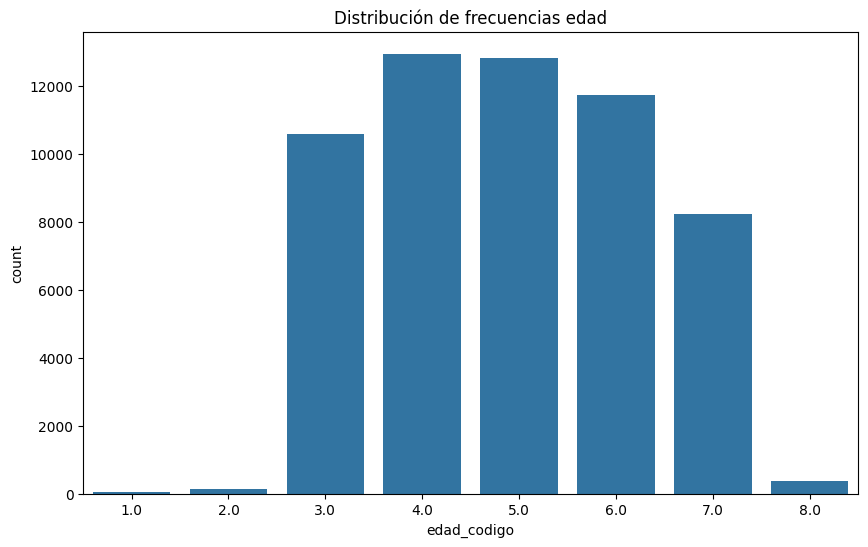

In [25]:
# gráfico de barras, distribución de frecuencias con edad
plt.figure(figsize=(10,6))
plt.title("Distribución de frecuencias edad")
sns.countplot(x=df_seleccion["edad_codigo"])

<Axes: title={'center': 'Distribución de frecuencias edad y sexo'}, xlabel='edad_codigo', ylabel='count'>

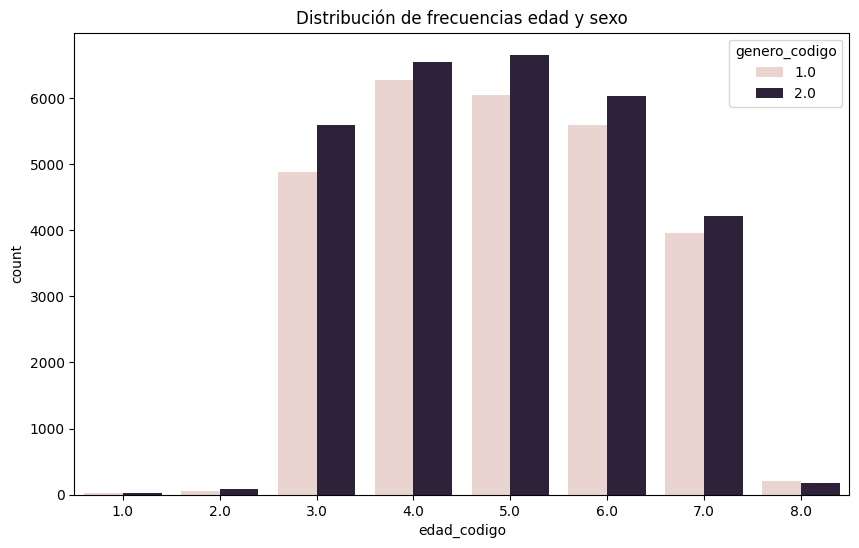

In [26]:
# gráfico de barras, distribución de frecuencias con edad y sexo.
# Distribución normal
plt.figure(figsize=(10,6))
plt.title("Distribución de frecuencias edad y sexo")
sns.countplot(x=df_seleccion["edad_codigo"],
              hue=df_seleccion["genero_codigo"])

<Axes: title={'center': 'Distribución de frecuencias estatura'}, xlabel='estatura', ylabel='Count'>

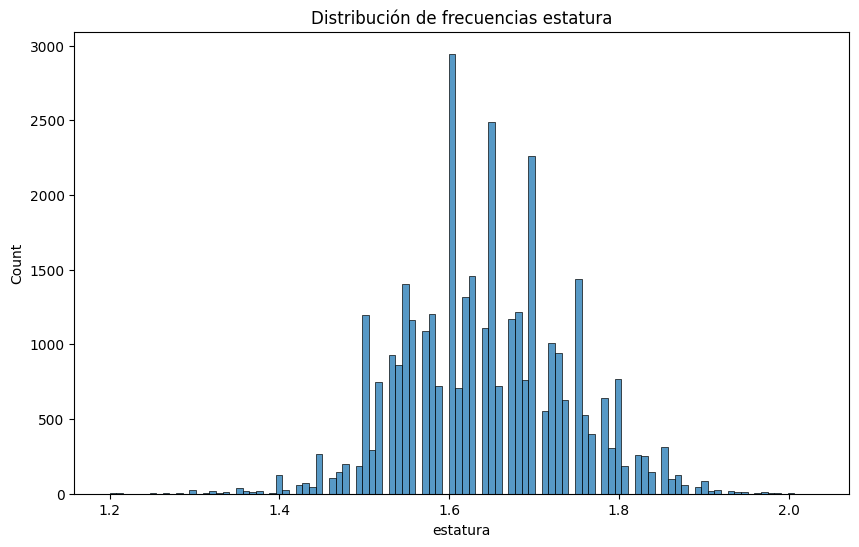

In [33]:
# Histograma de estaturas
plt.figure(figsize=(10,6))
plt.title("Distribución de frecuencias estatura")
sns.histplot(x=df_seleccion["estatura"])

<Axes: title={'center': 'Distribución de frecuencias peso'}, xlabel='peso', ylabel='Count'>

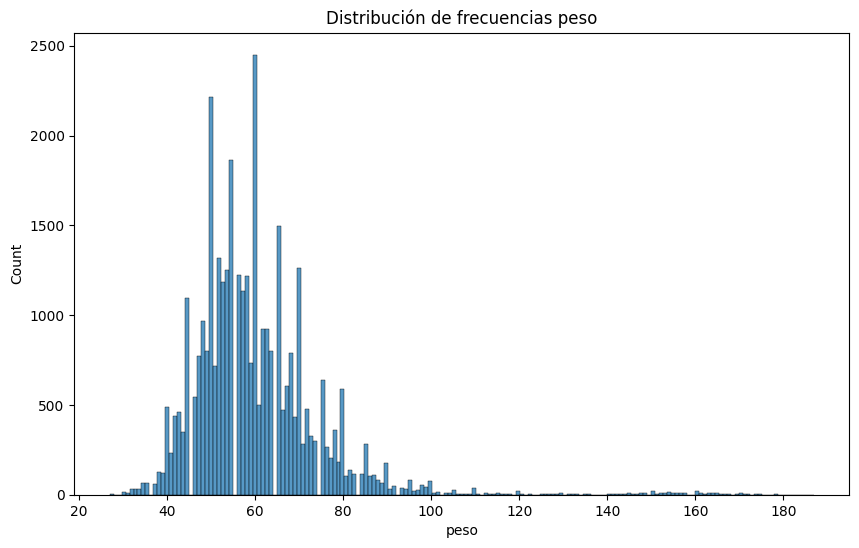

In [34]:
# Histograma de peso
plt.figure(figsize=(10,6))
plt.title("Distribución de frecuencias peso")
sns.histplot(x=df_seleccion["peso"])

<Axes: title={'center': 'Medidas de tendencia central y valores extremos - estatura'}, xlabel='estatura'>

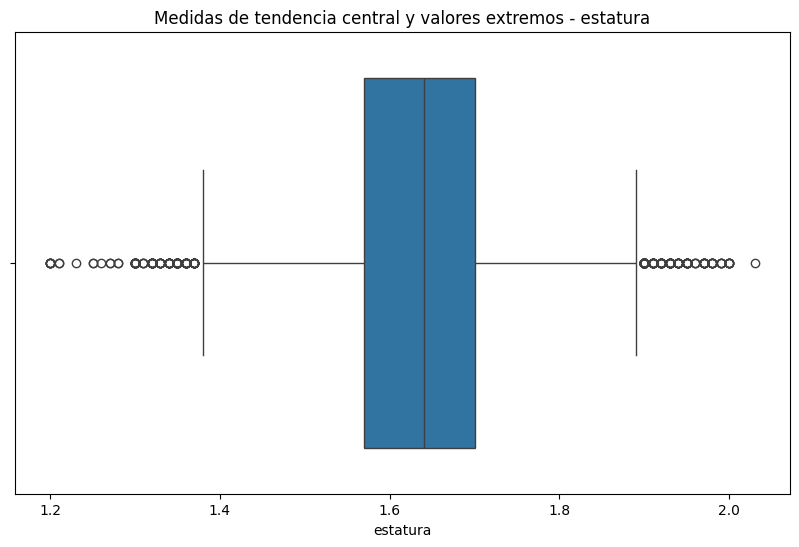

In [35]:
# Box plot de estatura para identificar valores extremos en comparación a las medidas de tendencia central
plt.figure(figsize=(10,6))
plt.title("Medidas de tendencia central y valores extremos - estatura")
sns.boxplot(x = df_seleccion["estatura"])

<Axes: title={'center': 'Medidas de tendencia central y valores extremos - peso'}, xlabel='peso'>

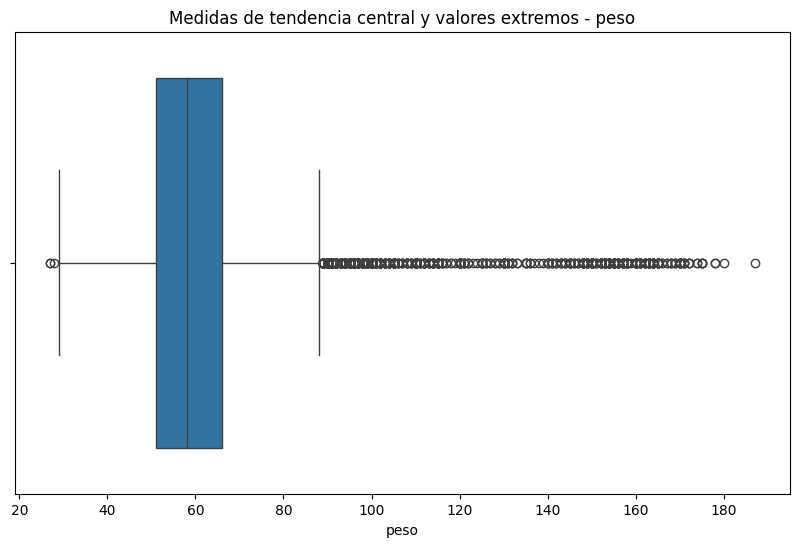

In [36]:
# Box plot de peso para identificar valores extremos en comparación a las medidas de tendencia central
plt.figure(figsize=(10,6))
plt.title("Medidas de tendencia central y valores extremos - peso")
sns.boxplot(x = df_seleccion["peso"])

In [38]:
# Creación de una nueva variable de Indice de Masa Corporal

df_seleccion["IMC"] = df_seleccion["peso"] / (df_seleccion["estatura"] ** 2)

df_seleccion

,id,edad_codigo,edad_texto,genero_codigo,genero_texto,estatura,peso,IMC
0,1,3.0,13 años,2.0,Femenino,NaN,NaN,NaN
1,2,3.0,13 años,2.0,Femenino,NaN,NaN,NaN
2,3,4.0,14 años,1.0,Masculino,1.67,56.0,20.079601
3,4,6.0,16 años,1.0,Masculino,1.73,70.0,23.388687
4,5,3.0,13 años,2.0,Femenino,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
56976,57091,6.0,16 años,1.0,Masculino,1.78,86.0,27.143037
56977,57092,6.0,16 años,1.0,Masculino,NaN,NaN,NaN
56978,57093,6.0,16 años,1.0,Masculino,NaN,NaN,NaN
56979,57094,6.0,16 años,2.0,Femenino,NaN,NaN,NaN


<Axes: title={'center': 'Distribución de frecuencias IMC'}, xlabel='IMC', ylabel='Count'>

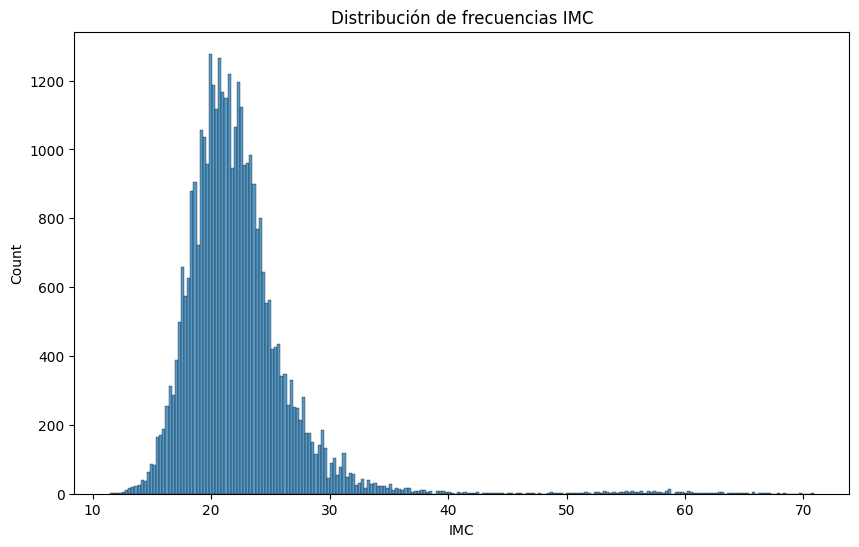

In [39]:
# Histograma de IMC

plt.figure(figsize=(10,6))
plt.title("Distribución de frecuencias IMC")
sns.histplot(x=df_seleccion["IMC"])

<Axes: title={'center': 'Medidas de tendencia central y valores extremos - IMC'}, xlabel='IMC'>

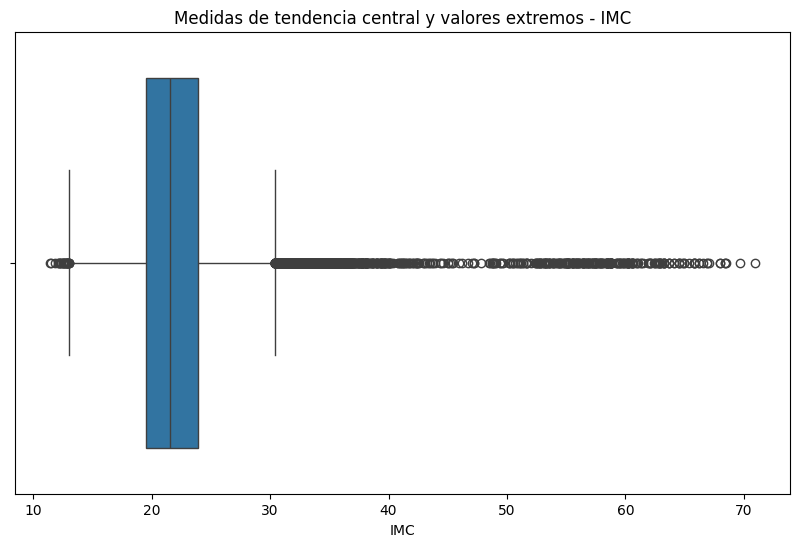

In [41]:
# Boxplot de IMC

plt.figure(figsize=(10,6))
plt.title("Medidas de tendencia central y valores extremos - IMC")
sns.boxplot(x=df_seleccion["IMC"])